In [2]:
'''
# ДОБАВЬТЕ В НАЧАЛО:
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
'''

In [10]:
# Оптимизация TensorFlow
import tensorflow as tf
tf.config.optimizer.set_jit(True)  # Включение XLA-компиляции
tf.config.threading.set_intra_op_parallelism_threads(8)
#tf.config.threading.set_inter_op_parallelism_threads(8)

# Для GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            #tf.config.experimental.set_memory_limit(gpu, 8192)  # Лимит 8GB
    except RuntimeError as e:
        print(e)

In [ ]:
#!pip install tensorboard

In [3]:
#!pip install scikit-optimize -q

In [5]:
#!pip install optuna -q

In [6]:
#!pip install optuna-integration[tfkeras] -q

In [7]:
#!pip install optuna-dashboard -q

In [3]:
# переключиться на полуточную арифметику (float16)
import tensorflow as tf
from tensorflow.keras.mixed_precision import Policy
policy = Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

In [5]:
!nvidia-smi

Sun Oct 19 18:48:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.01              Driver Version: 576.80         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070        On  |   00000000:01:00.0  On |                  N/A |
|  0%   42C    P8             12W /  200W |     851MiB /  12282MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [17]:
!curl -L -o ~/Downloads/animals10.zip\https://www.kaggle.com/api/v1/datasets/download/alessiocorrado99/animals10

curl: (2) no URL specified
curl: try 'curl --help' or 'curl --manual' for more information


In [1]:
# Текущая директория + путь к датасету

import os
HOME = os.getcwd()
print(HOME)
print('-----------------------')
# Пути
#IMAGE_PATH = "/home/oleg/projects/datasets/construction"

IMAGE_PATH = "/home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1"
#IMAGE_PATH = "/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img/"
#dataset_path = "./animals"
#dataset_path = "./cars_pretrained"
#dataset_path = "./construction"
#IMAGE_PATH = dataset_path
os.listdir(IMAGE_PATH)

/home/oleg/projects/ML/Wildfire_Satelite
-----------------------


['valid', 'train', 'test']

In [19]:
!ls /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2

home  raw-img  translate.py


In [14]:
import kagglehub
import os

# Установите переменную окружения ПЕРЕД импортом (если нужно перезапустить kernel)
os.environ['KAGGLE_HUB_CACHE'] = "/home/oleg/projects/datasets/kaggle_cache"

# Если уже импортировали kagglehub, перезапустите kernel или используйте:

# Скачиваем
path = kagglehub.dataset_download("alessiocorrado99/animals10")
print("Path to dataset files:", path)

import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


In [4]:
# как скачать датасет с Kaggle
'''
import os
import kaggle
import zipfile

# Скачаем напрямую через Kaggle API в текущую папку
dataset_name = 'bhavikjikadara/dog-and-cat-classification-dataset'
download_path = './cats_dogs_data'

print("📥 Downloading dataset...")
kaggle.api.dataset_download_files(
    dataset_name, 
    path=download_path, 
    unzip=True  # Важно: распаковываем автоматически!
)
'''

import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|████████████████████████████████████████████████████████████████████████████████| 586M/586M [00:21<00:00, 29.0MB/s]

Extracting files...


Path to dataset files: /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


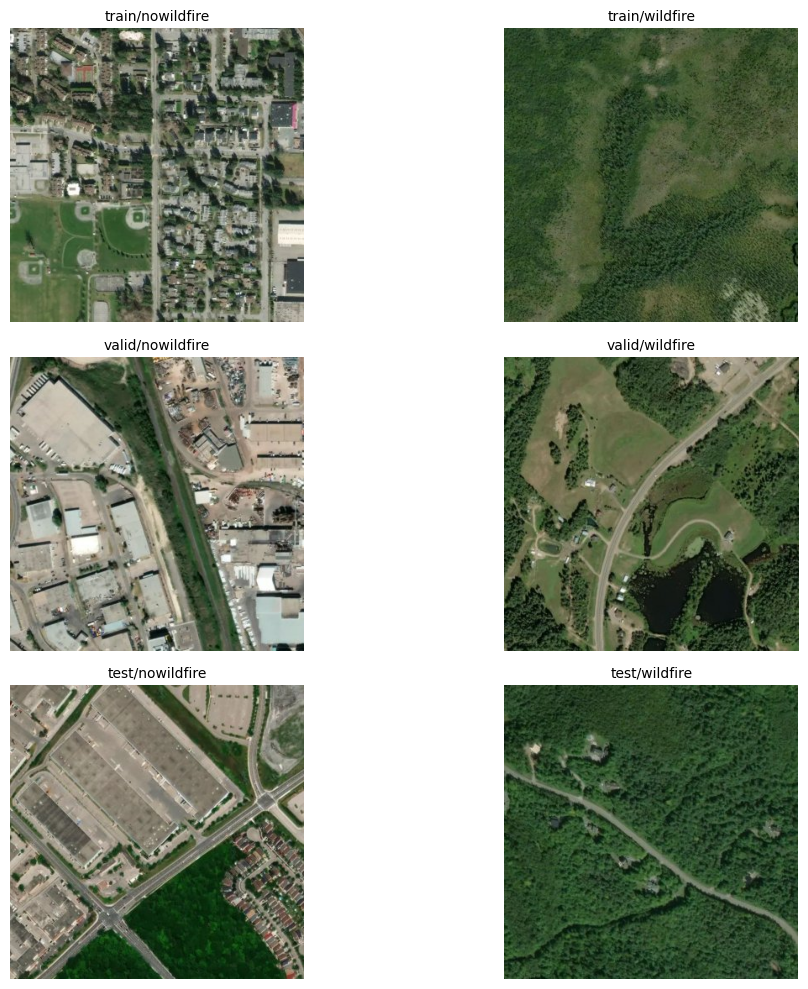

🎲 Показано изображения из 6 категорий


In [4]:
# Показать по 1 изображению из ВСЕХ категорий во ВСЕХ папках
from PIL import Image
import os
import matplotlib.pyplot as plt
import random

# Создаем большой график
splits = ["train", "valid", "test"]
fig, axes = plt.subplots(len(splits), 2, figsize=(12, 10))
axes = axes.ravel()

plot_index = 0

for split in splits:
    split_path = os.path.join(IMAGE_PATH, split)
    
    if os.path.exists(split_path):
        categories = [d for d in os.listdir(split_path) 
                     if os.path.isdir(os.path.join(split_path, d))]
        
        for category in categories[:2]:  # Берем первые 2 категории из каждого сплита
            category_path = os.path.join(split_path, category)
            file_names = [f for f in os.listdir(category_path) 
                         if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            
            if file_names:
                random_file = random.choice(file_names)
                img_path = os.path.join(category_path, random_file)
                
                try:
                    img = Image.open(img_path)
                    
                    axes[plot_index].imshow(img)
                    axes[plot_index].set_title(f"{split}/{category}", fontsize=10)
                    axes[plot_index].axis('off')
                    plot_index += 1
                    
                except Exception as e:
                    print(f"❌ Ошибка: {img_path}")
                    continue

# Скрываем лишние subplot'ы
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"🎲 Показано изображения из {plot_index} категорий")

📂 Папка: train
🏷️ Категории: ['nowildfire', 'wildfire']


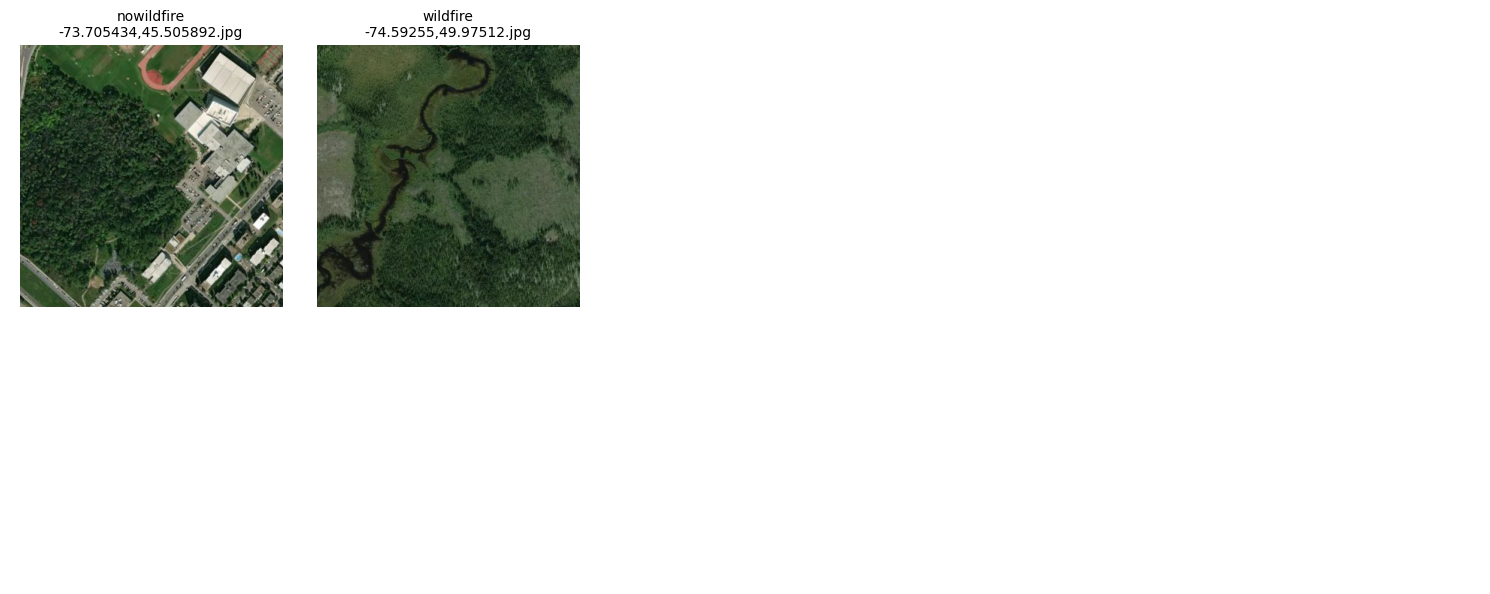

🎲 Показано по 1 случайному изображению из 2 категорий в папке 'train'


In [3]:
# Показано по 1 случайному изображению из каждой категорий
from PIL import Image
import os
import matplotlib.pyplot as plt
import random

# Создаем график 2x5
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

# Берем конкретную папку (train/valid/test) и смотрим на классы внутри
dataset_split = "train"  # Можно поменять на "valid" или "test"
split_path = os.path.join(IMAGE_PATH, dataset_split)
categories = os.listdir(split_path)

print(f"📂 Папка: {dataset_split}")
print(f"🏷️ Категории: {categories}")

plot_index = 0

for category in categories:
    category_path = os.path.join(split_path, category)
    
    # Проверяем что это директория, а не файл
    if os.path.isdir(category_path):
        file_names = [f for f in os.listdir(category_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Берем 1 случайное изображение из каждой категории
        if file_names:
            random_file = random.choice(file_names)
            img_path = os.path.join(category_path, random_file)
            
            try:
                img = Image.open(img_path)
                
                axes[plot_index].imshow(img)
                axes[plot_index].set_title(f"{category}\n{os.path.basename(random_file)}", fontsize=10)
                axes[plot_index].axis('off')
                plot_index += 1
                
            except Exception as e:
                print(f"❌ Ошибка загрузки {img_path}: {e}")
                continue

# Скрываем лишние subplot'ы
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"🎲 Показано по 1 случайному изображению из {plot_index} категорий в папке '{dataset_split}'")

🔍 Анализ структуры датасета...
📊 ПОЛНЫЙ АНАЛИЗ ДАТАСЕТА:

📁 TEST:
   nowildfire: 2820 файлов
   wildfire: 3480 файлов
   📈 ИТОГО в test: 6300 изображений, 2 классов

📁 TRAIN:
   nowildfire: 14500 файлов
   wildfire: 15750 файлов
   📈 ИТОГО в train: 30250 изображений, 2 классов

📁 VALID:
   nowildfire: 2820 файлов
   wildfire: 3480 файлов
   📈 ИТОГО в valid: 6300 изображений, 2 классов

🎯 ОБЩИЙ ИТОГ: 42850 изображений во всем датасете


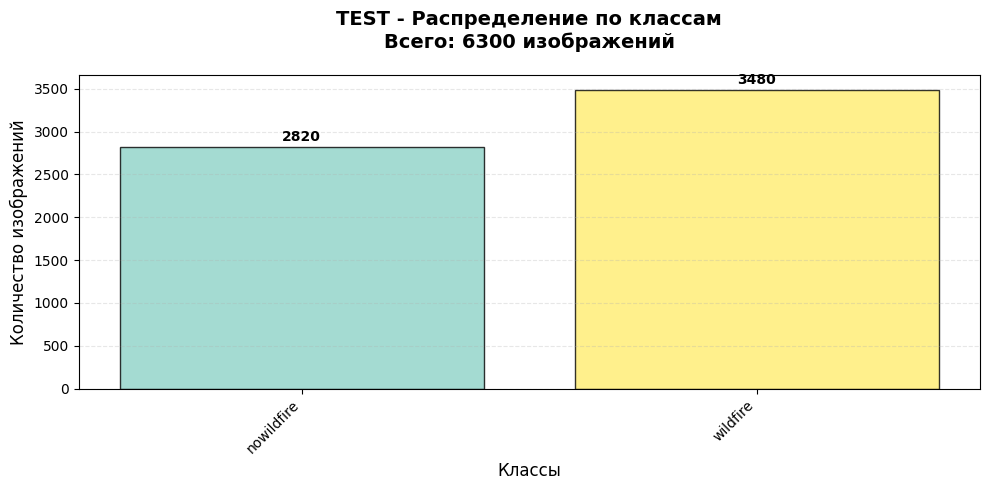

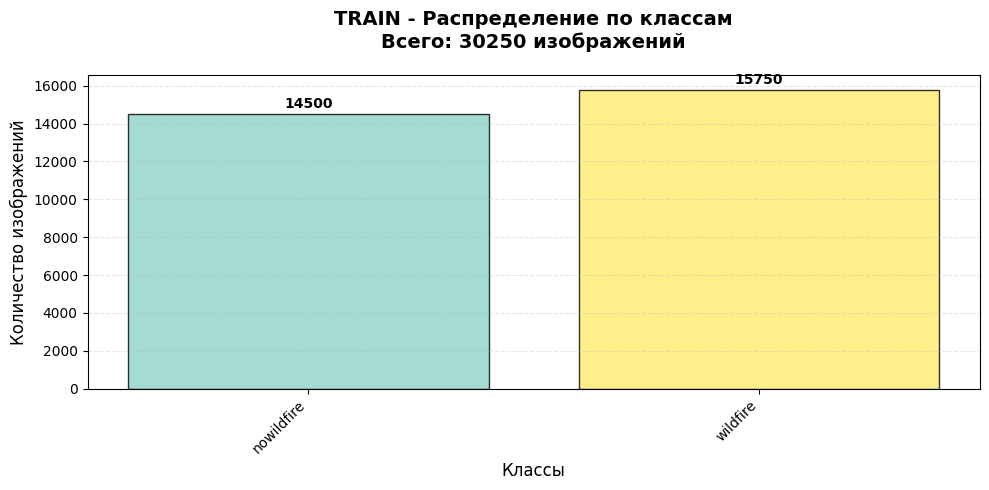

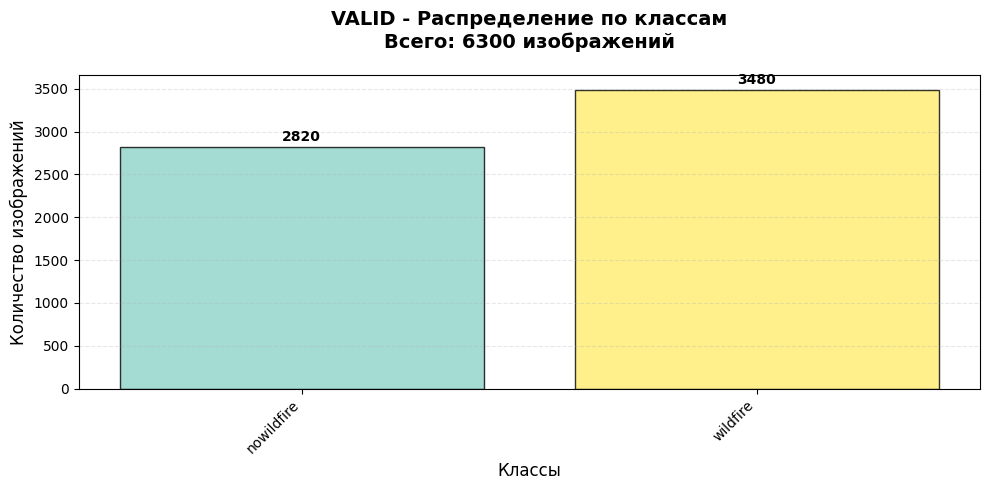

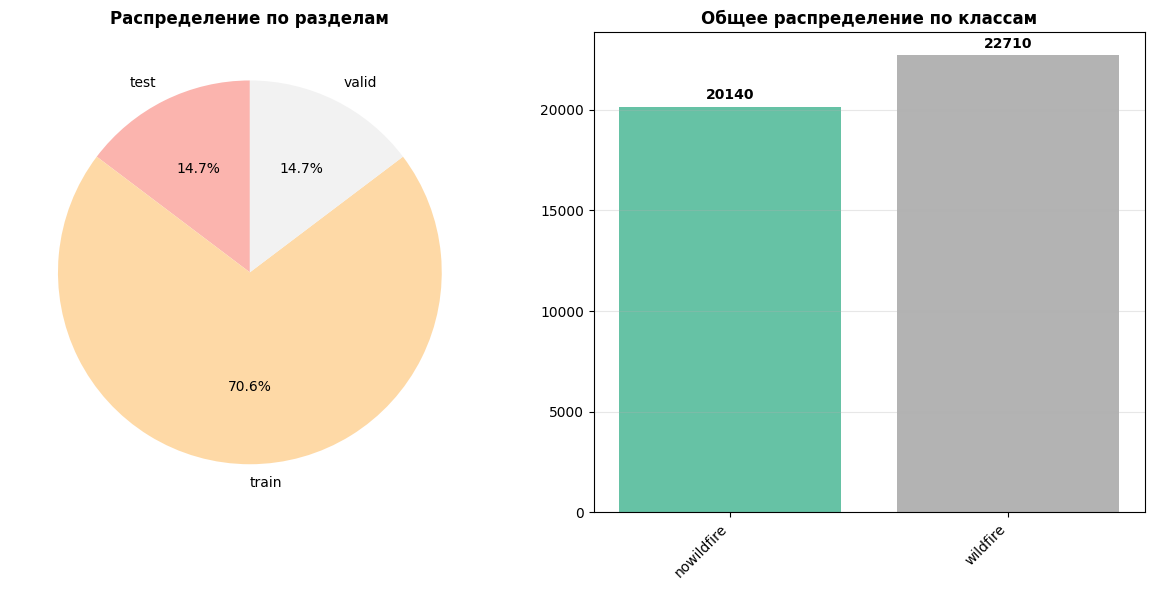


✅ Анализ завершен!
   test: 6300 файлов, 2 классов
   train: 30250 файлов, 2 классов
   valid: 6300 файлов, 2 классов


In [6]:
# Простой анализ датасета с визуализацией

import os
import matplotlib.pyplot as plt
import numpy as np

def analyze_dataset_complete(dataset_path):
    """
    Полный анализ всего датасета со всеми папками
    """
    # Проверяем существование пути
    if not os.path.exists(dataset_path):
        print(f"❌ Ошибка: путь '{dataset_path}' не существует")
        return None
    
    # Получаем список всех папок (train, valid, test)
    splits = [d for d in os.listdir(dataset_path) 
             if os.path.isdir(os.path.join(dataset_path, d))]
    splits.sort()
    
    if not splits:
        print("❌ В датасете не найдено папок (train, valid, test)")
        return None
    
    print("📊 ПОЛНЫЙ АНАЛИЗ ДАТАСЕТА:")
    print("=" * 50)
    
    all_stats = {}
    total_files_all = 0
    
    # Анализируем каждую папку
    for split in splits:
        split_path = os.path.join(dataset_path, split)
        
        # Получаем классы внутри папки
        class_names = [d for d in os.listdir(split_path) 
                      if os.path.isdir(os.path.join(split_path, d))]
        class_names.sort()
        
        if not class_names:
            print(f"❌ В папке '{split}' не найдено классов")
            continue
        
        # Подсчет файлов для этой папки
        class_counts = {}
        total_files_split = 0
        
        print(f"\n📁 {split.upper()}:")
        for class_name in class_names:
            class_path = os.path.join(split_path, class_name)
            image_files = [f for f in os.listdir(class_path) 
                          if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            count = len(image_files)
            class_counts[class_name] = count
            total_files_split += count
            print(f"   {class_name}: {count} файлов")
        
        print(f"   📈 ИТОГО в {split}: {total_files_split} изображений, {len(class_names)} классов")
        
        all_stats[split] = {
            'class_names': class_names,
            'class_counts': class_counts,
            'total_files': total_files_split
        }
        total_files_all += total_files_split
    
    print(f"\n🎯 ОБЩИЙ ИТОГ: {total_files_all} изображений во всем датасете")
    
    # Визуализация для каждой папки
    for split, stats in all_stats.items():
        _plot_split_distribution(split, stats)
    
    # Общая визуализация
    _plot_overall_distribution(all_stats, total_files_all)
    
    return all_stats

def _plot_split_distribution(split_name, stats):
    """Визуализация распределения для одной папки"""
    plt.figure(figsize=(10, 5))
    
    classes = list(stats['class_counts'].keys())
    counts = list(stats['class_counts'].values())
    
    # Создаем диаграмму
    colors = plt.cm.Set3(np.linspace(0, 1, len(classes)))
    bars = plt.bar(classes, counts, color=colors, edgecolor='black', alpha=0.8)
    
    # Настройки графика
    plt.title(f'{split_name.upper()} - Распределение по классам\nВсего: {stats["total_files"]} изображений', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Классы', fontsize=12)
    plt.ylabel('Количество изображений', fontsize=12)
    
    # Поворачиваем подписи
    plt.xticks(rotation=45, ha='right')
    
    # Добавляем значения на столбцы
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Сетка
    plt.grid(True, axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

def _plot_overall_distribution(all_stats, total_files):
    """Общая визуализация всего датасета"""
    plt.figure(figsize=(12, 6))
    
    splits = list(all_stats.keys())
    split_totals = [stats['total_files'] for stats in all_stats.values()]
    
    # Круговая диаграмма для разделов
    plt.subplot(1, 2, 1)
    plt.pie(split_totals, labels=splits, autopct='%1.1f%%', startangle=90,
            colors=plt.cm.Pastel1(np.linspace(0, 1, len(splits))))
    plt.title('Распределение по разделам', fontweight='bold')
    
    # Суммарное распределение по классам
    plt.subplot(1, 2, 2)
    
    # Суммируем количество файлов по классам из всех разделов
    class_totals = {}
    for split_stats in all_stats.values():
        for class_name, count in split_stats['class_counts'].items():
            class_totals[class_name] = class_totals.get(class_name, 0) + count
    
    classes = list(class_totals.keys())
    totals = list(class_totals.values())
    
    bars = plt.bar(classes, totals, color=plt.cm.Set2(np.linspace(0, 1, len(classes))))
    plt.title('Общее распределение по классам', fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    
    # Добавляем значения
    for bar, total in zip(bars, totals):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(totals)*0.01,
                f'{total}', ha='center', va='bottom', fontweight='bold')
    
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ИСПОЛЬЗОВАНИЕ:
print("🔍 Анализ структуры датасета...")
result = analyze_dataset_complete(IMAGE_PATH)

if result:
    print("\n✅ Анализ завершен!")
    for split, stats in result.items():
        print(f"   {split}: {stats['total_files']} файлов, {len(stats['class_names'])} классов")

In [9]:
# МЕТКИ INTEGER

# 🔥 ДОБАВЬТЕ ЭТО В САМОМ НАЧАЛЕ
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

height, width = 224, 224
batch_size = 32

print("🔄 СОЗДАЕМ ПАЙПЛАЙН...")

# 🎯 ИСПРАВЛЕНИЕ: Указываем ПРАВИЛЬНЫЙ путь к train папке
TRAIN_PATH = "/home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1/train"
VALID_PATH = "/home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1/valid"

# Загрузка данных из ПРАВИЛЬНЫХ папок
train_data_raw = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,  # ← путь к train папке с классами
    seed=42,
    image_size=(height, width),
    batch_size=batch_size,
    shuffle=True
)

validation_data_raw = tf.keras.preprocessing.image_dataset_from_directory(
    VALID_PATH,  # ← путь к valid папке с классами
    seed=42,
    image_size=(height, width), 
    batch_size=batch_size,
    shuffle=False
)

# Проверка формата
images, labels = next(iter(train_data_raw))
print(f"Labels shape: {labels.shape}")
print(f"Labels: {labels.numpy()[:10]}")  # Должны быть [0, 1, 0, 1, ...]

class_names = train_data_raw.class_names
num_classes = len(class_names)
print(f"🏷️ Классы: {class_names}")
print(f"🎯 Количество классов: {num_classes}")

# Аугментация
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Препроцессинг для EfficientNet
def preprocess_and_augment(image, label, training=False):
    """Правильный препроцессинг"""
    image = tf.cast(image, tf.float32) / 255.0  # ✅ Нормализация в [0, 1]
    if training:
        image = data_augmentation(image, training=True)
    return image, label

# Финальные datasets с правильным кэшированием
train_data = (
    train_data_raw
    .map(lambda x, y: preprocess_and_augment(x, y, training=True),
         num_parallel_calls=tf.data.AUTOTUNE)
    .cache()  # Кэшируем ПОСЛЕ препроцессинга
    .prefetch(tf.data.AUTOTUNE)
)

validation_data = (
    validation_data_raw
    .map(lambda x, y: preprocess_and_augment(x, y, training=False), 
         num_parallel_calls=tf.data.AUTOTUNE)
    .cache()  # Кэшируем ПОСЛЕ препроцессинга
    .prefetch(tf.data.AUTOTUNE)
)

# Убедимся что препроцессинг работает правильно
print("🔍 Проверка препроцессинга:")
for images, labels in train_data.take(1):
    print(f"Shape: {images.shape}")
    print(f"Data range: {tf.reduce_min(images):.3f} to {tf.reduce_max(images):.3f}")
    print(f"Mean: {tf.reduce_mean(images):.3f}")
    break

print("✅ Пайплайн создан!")

🔄 СОЗДАЕМ ПАЙПЛАЙН...
Found 30250 files belonging to 2 classes.
Found 6300 files belonging to 2 classes.
Labels shape: (32,)
Labels: [0 0 1 0 1 0 0 1 1 0]
🏷️ Классы: ['nowildfire', 'wildfire']
🎯 Количество классов: 2
🔍 Проверка препроцессинга:
Shape: (32, 224, 224, 3)
Data range: 0.000 to 0.999
Mean: 0.267
✅ Пайплайн создан!


2025-10-27 19:15:26.623033: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


🎯 Расчет весов классов из файловой системы...
🎯 Безопасный расчет весов классов...


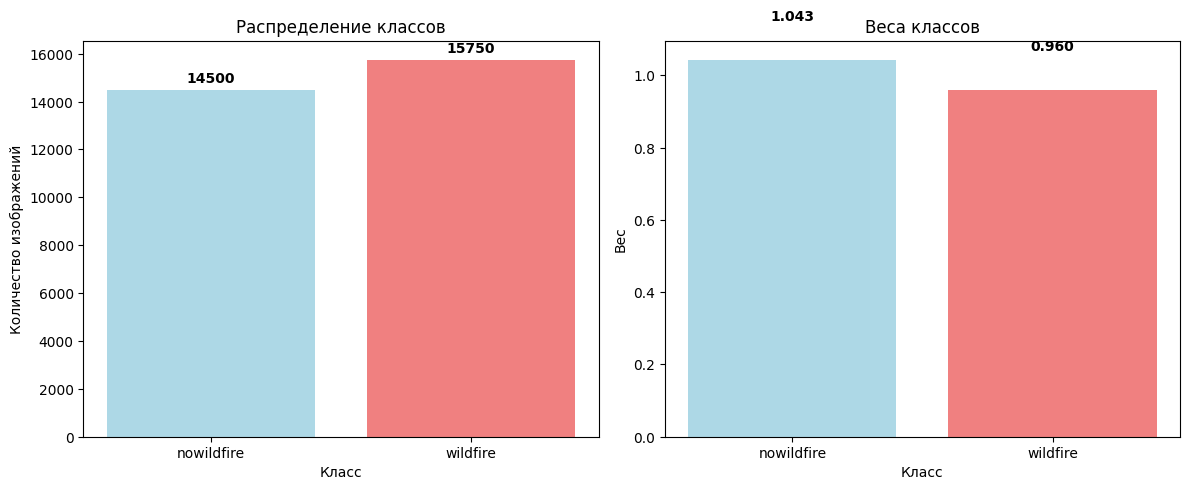

📊 РАСПРЕДЕЛЕНИЕ КЛАССОВ:
--------------------------------------------------
nowildfire      | 14500 |  47.9% | вес: 1.043
wildfire        | 15750 |  52.1% | вес: 0.960
--------------------------------------------------
ИТОГО           | 30250 | 100%  


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

def get_class_weights_from_directory(train_path, class_names):
    """
    Безопасный расчет весов классов из файловой системы
    """
    print("🎯 Безопасный расчет весов классов...")
    
    # Собираем количество файлов для каждого класса
    class_counts = []
    total_samples = 0
    
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(train_path, class_name)
        if os.path.exists(class_dir):
            # Считаем только валидные файлы изображений
            image_files = [f for f in os.listdir(class_dir) 
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            count = len(image_files)
            class_counts.append(count)
            total_samples += count
        else:
            class_counts.append(0)
    
    # Создаем массив меток для расчета весов
    y_train = []
    for i, count in enumerate(class_counts):
        y_train.extend([i] * count)
    
    y_train = np.array(y_train)
    
    # Расчет весов
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    
    weights_dict = dict(enumerate(class_weights))
    
    # Визуализация
    plt.figure(figsize=(12, 5))
    
    # График 1: Распределение классов
    plt.subplot(1, 2, 1)
    unique, counts = np.unique(y_train, return_counts=True)
    colors = ['lightblue', 'lightcoral']
    bars = plt.bar(range(len(unique)), counts, color=colors[:len(unique)])
    plt.title('Распределение классов')
    plt.xlabel('Класс')
    plt.ylabel('Количество изображений')
    plt.xticks(range(len(unique)), [class_names[i] for i in unique])
    
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01, 
                f'{count}', ha='center', va='bottom', fontweight='bold')
    
    # График 2: Веса классов
    plt.subplot(1, 2, 2)
    bars = plt.bar(weights_dict.keys(), weights_dict.values(), color=colors[:len(unique)])
    plt.title('Веса классов')
    plt.xlabel('Класс')
    plt.ylabel('Вес')
    plt.xticks(range(len(unique)), [class_names[i] for i in unique])
    
    for bar, weight in zip(bars, weights_dict.values()):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{weight:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Вывод информации
    print("📊 РАСПРЕДЕЛЕНИЕ КЛАССОВ:")
    print("-" * 50)
    for i, class_name in enumerate(class_names):
        count = class_counts[i]
        percentage = count / total_samples * 100
        weight = weights_dict.get(i, 0)
        print(f"{class_name:15} | {count:5} | {percentage:5.1f}% | вес: {weight:.3f}")
    
    print("-" * 50)
    print(f"{'ИТОГО':15} | {total_samples:5} | {'100%':6}")
    
    return weights_dict

# ИСПОЛЬЗОВАНИЕ:
TRAIN_PATH = "/home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1/train"
class_names = ['nowildfire', 'wildfire']  # или получите из train_data_raw.class_names

print("🎯 Расчет весов классов из файловой системы...")
class_weights = get_class_weights_from_directory(TRAIN_PATH, class_names)

🎲 АУГМЕНТИРОВАННЫЕ ИЗОБРАЖЕНИЯ ИЗ TRAIN_DATA:
Размер батча: (32, 224, 224, 3)
Количество изображений: 32


2025-10-27 19:17:39.026337: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


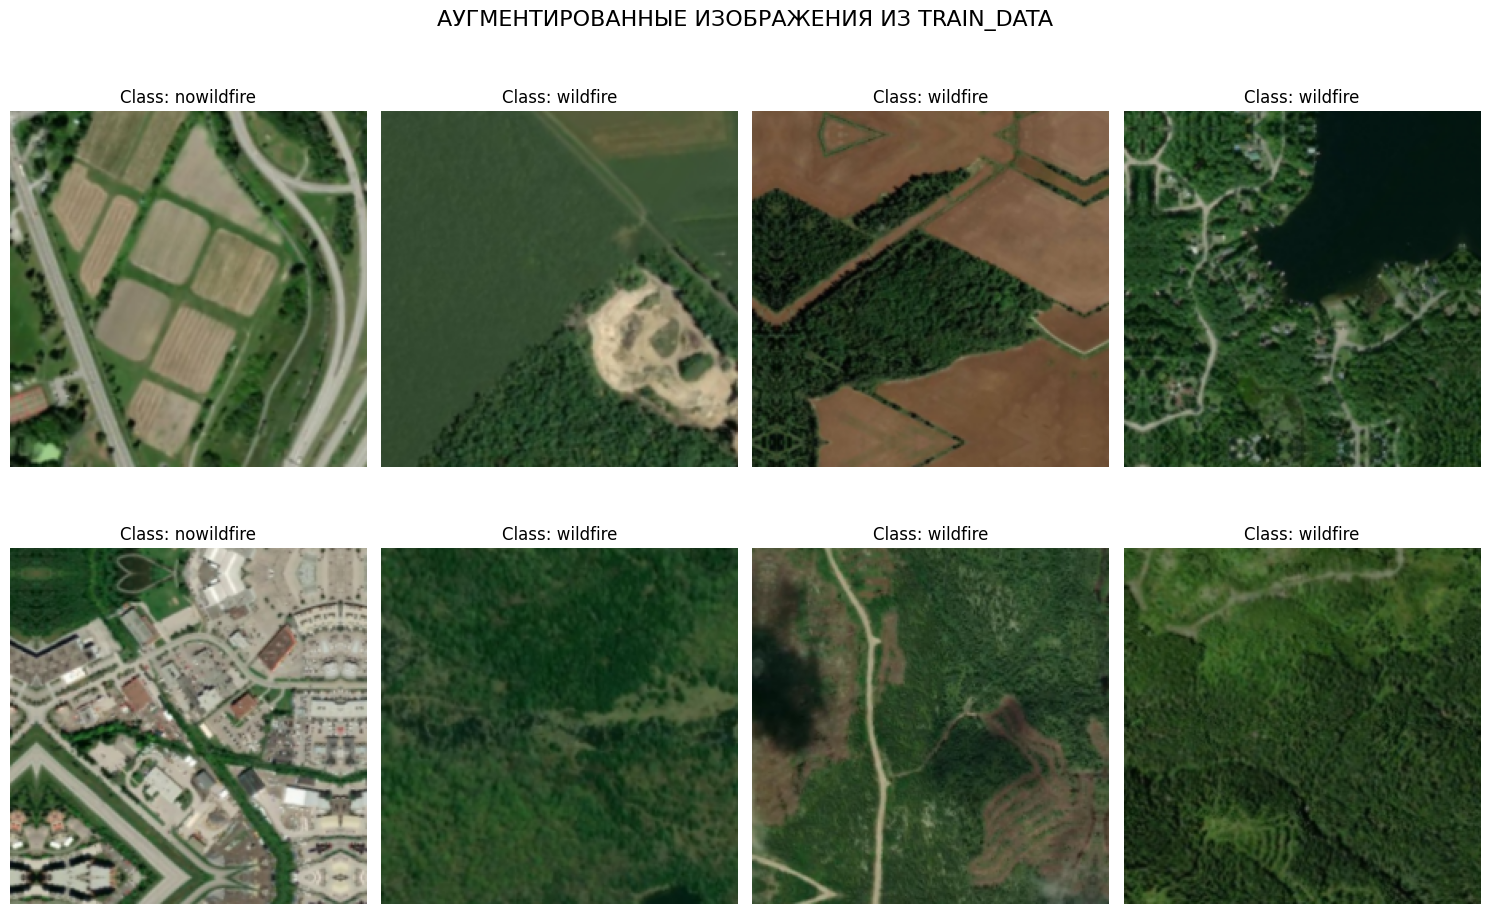

Диапазон данных в батче: 0.000 до 1.000


In [12]:
def show_augmented_batch():
    """Показывает аугментированные изображения из train_data"""
    # Берем один батч из train_data
    for images, labels in train_data.take(1):
        print(f"Размер батча: {images.shape}")  # (batch_size, height, width, channels)
        print(f"Количество изображений: {len(images)}")
        
        plt.figure(figsize=(15, 10))
        
        # Показываем первые 8 изображений из батча
        for i in range(min(8, len(images))):
            plt.subplot(2, 4, i+1)
            
            # Берем изображение из батча
            image = images[i]
            label = labels[i]
            
            # Денормализуем если нужно (из [0,1] в [0,255])
            if tf.reduce_max(image) <= 1.0:
                image = image * 255
            image = tf.cast(image, tf.uint8)
            
            plt.imshow(image)
            plt.title(f'Class: {class_names[label.numpy()]}')
            plt.axis('off')
        
        plt.suptitle('АУГМЕНТИРОВАННЫЕ ИЗОБРАЖЕНИЯ ИЗ TRAIN_DATA', fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # Проверяем диапазон данных
        print(f"Диапазон данных в батче: {tf.reduce_min(images):.3f} до {tf.reduce_max(images):.3f}")
        break

# Запускаем
print("🎲 АУГМЕНТИРОВАННЫЕ ИЗОБРАЖЕНИЯ ИЗ TRAIN_DATA:")
show_augmented_batch()

In [13]:
def visualize_single_example_per_class(dataset, class_names, title=""):
    """
    Визуализация по одному примеру для каждого класса
    """
    # Собираем все изображения и метки
    all_images = []
    all_labels = []
    
    for images, labels in dataset.take(10):  # Берем несколько батчей
        all_images.append(images.numpy())
        all_labels.append(labels.numpy())
    
    all_images = np.concatenate(all_images, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    
    # Создаем сетку для визуализации
    cols = len(class_names)
    fig, axes = plt.subplots(1, cols, figsize=(3*cols, 3))
    
    if cols == 1:
        axes = [axes]
    
    fig.suptitle(f'{title}\n(по одному примеру на класс)', fontsize=14, fontweight='bold', y=1.05)
    
    for class_idx, class_name in enumerate(class_names):
        ax = axes[class_idx]
        
        # Находим первый пример этого класса
        class_mask = all_labels == class_idx
        class_examples = all_images[class_mask]
        
        if len(class_examples) > 0:
            # Берем первый пример класса
            image = class_examples[0].copy()
            
            # Восстанавливаем оригинальные цвета
            image[..., 0] += 103.939  # B
            image[..., 1] += 116.779  # G
            image[..., 2] += 123.68   # R
            image = np.clip(image, 0, 255).astype('uint8')
            image = image[..., ::-1]  # BGR → RGB
            
            ax.imshow(image)
            ax.set_title(f'{class_name}\n(1 пример)', fontsize=10)
        else:
            ax.imshow(np.zeros((224, 224, 3)))
            ax.set_title(f'{class_name}\n(нет примеров)', fontsize=10)
            ax.text(0.5, 0.5, 'Нет примеров', 
                   ha='center', va='center', 
                   transform=ax.transAxes, fontsize=8)
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(False)
    
    plt.tight_layout()
    plt.show()

# БЫСТРАЯ версия распределения
def visualize_class_distribution_simple(dataset, class_names, title=""):
    """
    Упрощенная визуализация распределения классов
    """
    # Считаем количество примеров по классам
    class_counts = {name: 0 for name in class_names}
    
    for images, labels in dataset:
        for label in labels.numpy():
            class_counts[class_names[label]] += 1
    
    # Визуализация
    plt.figure(figsize=(9, 3))
    
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    bars = plt.bar(classes, counts, color='lightblue', edgecolor='black', alpha=0.7)
    plt.title(f'{title}\nРаспределение по классам', fontsize=14, fontweight='bold')
    plt.xlabel('Классы')
    plt.ylabel('Количество примеров')
    plt.xticks(rotation=45)
    
    # Добавляем значения на столбцы
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{count}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return class_counts

# Тестируем упрощенную версию
print("🎨 ВИЗУАЛИЗАЦИЯ (1 пример на класс):")
print("📊 Распределение в тренировочных данных:")
train_counts = visualize_class_distribution_simple(train_data, class_names, "ТРЕНИРОВОЧНЫЕ ДАННЫЕ")

print("📊 Распределение в валидационных данных:")
val_counts = visualize_class_distribution_simple(validation_data, class_names, "ВАЛИДАЦИОННЫЕ ДАННЫЕ")

print("\n🖼️ По одному примеру на класс (тренировка):")
visualize_single_example_per_class(train_data, class_names, "ТРЕНИРОВОЧНЫЕ ДАННЫЕ")

print("\n🖼️ По одному примеру на класс (валидация):")
visualize_single_example_per_class(validation_data, class_names, "ВАЛИДАЦИОННЫЕ ДАННЫЕ")

🎨 ВИЗУАЛИЗАЦИЯ (1 пример на класс):
📊 Распределение в тренировочных данных:


2025-10-27 19:18:05.452847: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 46/350
2025-10-27 19:18:05.879241: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]]


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

In [14]:
# v1 LivePlotCallback

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import IPython.display as display

class LivePlotCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.fig = make_subplots(rows=1, cols=2, subplot_titles=('Loss', 'Accuracy'))
        self.loss_x, self.loss_y = [], []
        self.acc_x, self.acc_y = [], []
        self.val_loss_x, self.val_loss_y = [], []
        self.val_acc_x, self.val_acc_y = [], []
        
    def on_epoch_end(self, epoch, logs=None):
        # Обновляем данные
        self.loss_x.append(epoch)
        self.loss_y.append(logs['loss'])
        self.acc_x.append(epoch) 
        self.acc_y.append(logs['accuracy'])
        self.val_loss_x.append(epoch)
        self.val_loss_y.append(logs['val_loss'])
        self.val_acc_x.append(epoch)
        self.val_acc_y.append(logs['val_accuracy'])
        
        # Обновляем график
        self.fig.data = []
        self.fig.add_trace(go.Scatter(x=self.loss_x, y=self.loss_y, name='Train Loss'), row=1, col=1)
        self.fig.add_trace(go.Scatter(x=self.val_loss_x, y=self.val_loss_y, name='Val Loss'), row=1, col=1)
        self.fig.add_trace(go.Scatter(x=self.acc_x, y=self.acc_y, name='Train Acc'), row=1, col=2)
        self.fig.add_trace(go.Scatter(x=self.val_acc_x, y=self.val_acc_y, name='Val Acc'), row=1, col=2)
        
        # Показываем обновленный график
        display.clear_output(wait=True)
        self.fig.show()

# Теперь можно использовать
live_plot = LivePlotCallback()        

In [22]:
# v2

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import IPython.display as display

class LivePlotCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.fig = make_subplots(
            rows=1, 
            cols=2, 
            subplot_titles=('Loss', 'Accuracy')
        )
        self.loss_x, self.loss_y = [], []
        self.acc_x, self.acc_y = [], []
        self.val_loss_x, self.val_loss_y = [], []
        self.val_acc_x, self.val_acc_y = [], []
        
    def on_epoch_end(self, epoch, logs=None):
        # Обновляем данные
        self.loss_x.append(epoch)
        self.loss_y.append(logs['loss'])
        self.acc_x.append(epoch) 
        self.acc_y.append(logs['accuracy'])
        self.val_loss_x.append(epoch)
        self.val_loss_y.append(logs['val_loss'])
        self.val_acc_x.append(epoch)
        self.val_acc_y.append(logs['val_accuracy'])
        
        # Очищаем и обновляем график
        self.fig.data = []
        
        # Loss график
        self.fig.add_trace(
            go.Scatter(x=self.loss_x, y=self.loss_y, name='Train Loss'), 
            row=1, col=1
        )
        self.fig.add_trace(
            go.Scatter(x=self.val_loss_x, y=self.val_loss_y, name='Val Loss'), 
            row=1, col=1
        )
        
        # Accuracy график
        self.fig.add_trace(
            go.Scatter(x=self.acc_x, y=self.acc_y, name='Train Acc'), 
            row=1, col=2
        )
        self.fig.add_trace(
            go.Scatter(x=self.val_acc_x, y=self.val_acc_y, name='Val Acc'), 
            row=1, col=2
        )
        
        # Обновляем layout
        self.fig.update_layout(
            title=f'Training Progress - Epoch {epoch}',
            width=1000,
            height=400
        )
        
        # Показываем обновленный график
        display.clear_output(wait=True) # Промежуточные эпохи скрываются благодаря display.clear_output(wait=True)
        self.fig.show()

# Теперь можно использовать
live_plot = LivePlotCallback()

In [38]:
# v3

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import IPython.display as display

class LivePlotCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.fig = make_subplots(
            rows=1, 
            cols=2, 
            subplot_titles=('Model Accuracy', 'Model Loss'),
            horizontal_spacing=0.1
        )
        self.loss_x, self.loss_y = [], []
        self.acc_x, self.acc_y = [], []
        self.val_loss_x, self.val_loss_y = [], []
        self.val_acc_x, self.val_acc_y = [], []
        
    def on_epoch_end(self, epoch, logs=None):
        # Обновляем данные
        self.loss_x.append(epoch)
        self.loss_y.append(logs['loss'])
        self.acc_x.append(epoch) 
        self.acc_y.append(logs['accuracy'])
        self.val_loss_x.append(epoch)
        self.val_loss_y.append(logs['val_loss'])
        self.val_acc_x.append(epoch)
        self.val_acc_y.append(logs['val_accuracy'])
        
        # Очищаем и обновляем график
        self.fig.data = []
        
        # Accuracy график (слева)
        self.fig.add_trace(
            go.Scatter(
                x=self.acc_x, 
                y=self.acc_y, 
                name='Training Accuracy',
                line=dict(width=3, color='blue')
            ), 
            row=1, col=1
        )
        self.fig.add_trace(
            go.Scatter(
                x=self.val_acc_x, 
                y=self.val_acc_y, 
                name='Validation Accuracy',
                line=dict(width=3, color='red')
            ), 
            row=1, col=1
        )
        
        # Loss график (справа)
        self.fig.add_trace(
            go.Scatter(
                x=self.loss_x, 
                y=self.loss_y, 
                name='Training Loss',
                line=dict(width=3, color='blue')
            ), 
            row=1, col=2
        )
        self.fig.add_trace(
            go.Scatter(
                x=self.val_loss_x, 
                y=self.val_loss_y, 
                name='Validation Loss',
                line=dict(width=3, color='red')
            ), 
            row=1, col=2
        )
        
        # Обновляем layout в стиле matplotlib
        self.fig.update_layout(
            title=dict(
                text=f'Training Progress - Epoch {epoch}',
                x=0.5,
                font=dict(size=16)
            ),
            width=1200,
            height=500,
            showlegend=True,
            legend=dict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1
            )
        )
        
        # Обновляем оси в стиле matplotlib
        self.fig.update_xaxes(
            title_text="Epoch", 
            gridcolor='lightgray', 
            gridwidth=1,
            row=1, col=1
        )
        self.fig.update_yaxes(
            title_text="Accuracy", 
            gridcolor='lightgray', 
            gridwidth=1,
            row=1, col=1
        )
        
        self.fig.update_xaxes(
            title_text="Epoch", 
            gridcolor='lightgray', 
            gridwidth=1,
            row=1, col=2
        )
        self.fig.update_yaxes(
            title_text="Loss", 
            gridcolor='lightgray', 
            gridwidth=1,
            row=1, col=2
        )
        
        # Добавляем сетку как в matplotlib
        self.fig.update_layout(
            plot_bgcolor='white'
        )
        
        # Показываем обновленный график
        display.clear_output(wait=True)
        self.fig.show()

# Теперь можно использовать
live_plot = LivePlotCallback()

In [39]:
def create_head(x):
    # exp_4

    # 98.28
    
    x = GlobalAveragePooling2D()(x)
    
    # Первый слой с регуляризацией L2
    x = Dense(256, activation = 'relu', kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.7)(x)
    
    # Второй слой с регуляризацией L2
    x = Dense(128, activation = 'relu', kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    return x
    

In [15]:
def create_head(x):
    # exp_9
    
    # 3. КЛАССИФИКАТОР С ДВОЙНЫМ POOLING
    gap = GlobalAveragePooling2D()(x)
    gmp = GlobalMaxPooling2D()(x)
    x = Concatenate()([gap, gmp])
    x = BatchNormalization()(x)
    
    # Первый слой с регуляризацией L2
    x = Dense(512, activation = 'relu', kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.7)(x)
    
    # Второй слой с регуляризацией L2
    x = Dense(128, activation = 'relu', kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    return x

In [16]:
# Обучаем финальную модель дольше
# Полный код для вашего случая

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetV2S, EfficientNetV2M, EfficientNetV2L
from tensorflow.keras.applications import EfficientNetV2B0, EfficientNetV2B1, EfficientNetV2B2, EfficientNetV2B3
from tensorflow.keras.applications import ConvNeXtTiny, ConvNeXtSmall, ConvNeXtBase, ConvNeXtLarge, ConvNeXtXLarge  

from tensorflow.keras import layers, Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, GlobalMaxPooling2D, Dense, Dropout, BatchNormalization, Activation, Concatenate, Add)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import datetime
import os
#from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2




# Использование
live_plot = LivePlotCallback()

import gc
#tf.keras.backend.clear_session()
gc.collect()     # принудительно очищаем
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=0'
tf.get_logger().setLevel('ERROR')

# 🔧 СЛОВАРЬ MODELS:
MODELS = {
    # EfficientNetV2 Family (рекомендуется)
    'EfficientNetV2B0': EfficientNetV2B0,
    'EfficientNetV2B1': EfficientNetV2B1, 
    'EfficientNetV2B2': EfficientNetV2B2,
    'EfficientNetV2B3': EfficientNetV2B3,
    'EfficientNetV2S': EfficientNetV2S,
    'EfficientNetV2M': EfficientNetV2M, 
    'EfficientNetV2L': EfficientNetV2L,
   
    # ResNet Family  
    'ResNet50': ResNet50,
    # 'ResNeXt50': ResNeXt50,

    #   print("⚠️ ConvNeXt не установлен. Для установки: pip install convnext-tensorflow")
    # ConvNeXt Family
    'ConvNeXtTiny': ConvNeXtTiny,
    'ConvNeXtSmall': ConvNeXtSmall,
    'ConvNeXtBase': ConvNeXtBase, 
    'ConvNeXtLarge': ConvNeXtLarge,
    'ConvNeXtXLarge': ConvNeXtXLarge,
}


# =============================================================================
# 🔧 ПРЕДВАРИТЕЛЬНЫЕ НАСТРОЙКИ (ДОЛЖНЫ БЫТЬ ОПРЕДЕЛЕНЫ!)
# =============================================================================

# 🎯 ЗАДАЙТЕ ЭТИ ПЕРЕМЕННЫЕ ПЕРЕД ЗАПУСКОМ:

#model_name = 'EfficientNetV2S'  # Или 'EfficientNetV2S' и т.д.

#model_name = 'ConvNeXtTiny'  # Или 'EfficientNetV2S' и т.д.
#model_name = 'ConvNeXtSmall'  # Или 'EfficientNetV2S' и т.д.
model_name = 'ConvNeXtBase'  # Или 'EfficientNetV2S' и т.д.
#model_name = 'ConvNeXtLarge'  # Или 'EfficientNetV2S' и т.д.


height, width = 224, 224

# # ОЦЕНКА НЕ ОБУЧЕННОЙ МОДЕЛИ
# print(f"\n📊 ОЦЕНКА НЕ ОБУЧЕННОЙ  МОДЕЛИ...")
# val_results = model.evaluate(validation_data, verbose=1)
# val_loss, val_accuracy = val_results[0], val_results[1]
# print(f"✅ Результаты обученной модели:")
# print(f"   - Validation Accuracy: {val_accuracy:.4f}")
# print(f"   - Validation Loss: {val_loss:.4f}")

inputs = tf.keras.Input(shape=(height, width, 3))

base_model = MODELS[model_name](weights='imagenet', include_top=False, input_shape=(height, width, 3))
#base_model = MODELS[model_name](weights='imagenet', include_top=False, input_shape=(height, width, 3))
base_model.trainable = False

x = base_model(inputs, training=False)


#==========================ГОЛОВА===============================
# Создаём и добавляем головную часть
x = create_head(x)
#==========================ГОЛОВА===============================

# Завершённый слой классификации
outputs = Dense(num_classes, activation='softmax')(x)

learning_rate = 0.0001 

# Собираем и компилируем модель
model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

import mlflow
import mlflow.keras
mlflow.set_experiment("animals10_9")

#🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑
#debug = input("Нажми Enter чтобы продолжить...") # 🛑 Остановка для отладки
#########################################################################################

with mlflow.start_run():
    # Автоматическое логирование
    mlflow.keras.autolog()
    final_history = model.fit(
        train_data,
        epochs=50,
        validation_data=validation_data,
        class_weight=class_weights,  # ← вот это если надо функция баланса классов class_weights
        callbacks=[
            tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, verbose=1),
            tf.keras.callbacks.ModelCheckpoint(f'best_model_callback.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=7, factor=0.1, verbose=1),
            #tensorboard_callback,
            live_plot,
            #wandb.keras.WandbCallback(monitor="val_accuracy", mode="max", save_model=True, log_weights=True, log_gradients=True)
        ],
        verbose=1

        # Сохранение модели с новым параметром   
    )
    #best_val_acc = max(final_history.history['val_accuracy'])
    #mlflow.log_metric("best_val_accuracy", best_val_acc)
    
# mlflow.keras.log_model(
#     model,
#     "model",  # новый параметр вместо artifact_path
#     registered_model_name="animals10_model_8"
# )

# ОЦЕНКА ОБУЧЕННОЙ МОДЕЛИ
print(f"\n📊 ОЦЕНКА ОБУЧЕННОЙ МОДЕЛИ...")
val_results = model.evaluate(validation_data, verbose=1)
val_loss, val_accuracy = val_results[0], val_results[1]
print(f"✅ Результаты обученной модели:")
print(f"   - Validation Accuracy: {val_accuracy:.4f}")
print(f"   - Validation Loss: {val_loss:.4f}")

# 8. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
# Сохраняем модель
model.save(f'best_animals10_{val_accuracy:.4f}.keras')
print(f"💾 Модель сохранена как 'best_animals10_{val_accuracy:.4f}.keras")

import gc
tf.keras.backend.clear_session()
gc.collect()     # принудительно очищаем

# 


2025-10-27 19:19:03.292932: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 46/350
2025/10/27 19:19:03 WARNING mlflow.keras.autologging: Failed to log dataset information to MLflow. Reason: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 
2025-10-27 19:19:03.864785: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node GroupCrossDeviceControlEdges_0/NoOp/_21}}]] [type.googleapis.com/tensorflow.DerivedStatus='']
2025-10-27 19:19:03.865353: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discard

Epoch 1/50


I0000 00:00:1761581948.780868   27013 service.cc:152] XLA service 0x74d9780166c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761581948.781089   27013 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-10-27 19:19:09.298419: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1761581950.629679   27013 cuda_dnn.cc:529] Loaded cuDNN version 91400
2025-10-27 19:19:11.865218: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 576 bytes spill stores, 488 bytes spill loads

2025-10-27 19:19:11.897884: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 588 by

263/946 ━━━━━━━━━━━━━━━━━━━━ 56s 83ms/step - accuracy: 0.7957 - loss: 0.6786

2025-10-27 19:19:39.726875: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 46/350


350/946 ━━━━━━━━━━━━━━━━━━━━ 47s 80ms/step - accuracy: 0.8037 - loss: 0.6582

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) INVALID_ARGUMENT:  jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_multi_step_on_iterator_29817]

In [ ]:
!tensorboard --logdir logs/fit

/home/oleg/miniconda3/envs/TF/lib/python3.10/site-packages/tensorboard/default.py:30: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


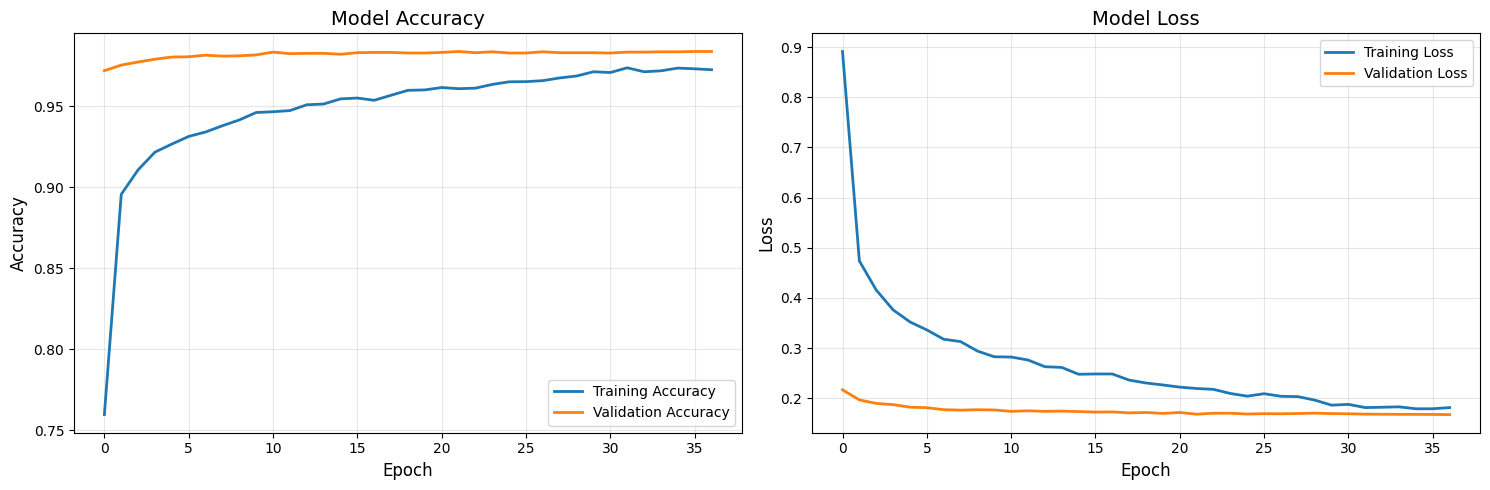

In [54]:
# Визуализация результатов

import matplotlib.pyplot as plt
import numpy as np

#history = final_history

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # График точности
    ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    ax1.set_title('Model Accuracy', fontsize=14)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # График потерь
    ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
    ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    ax2.set_title('Model Loss', fontsize=14)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Построим графики
plot_training_history(final_history)

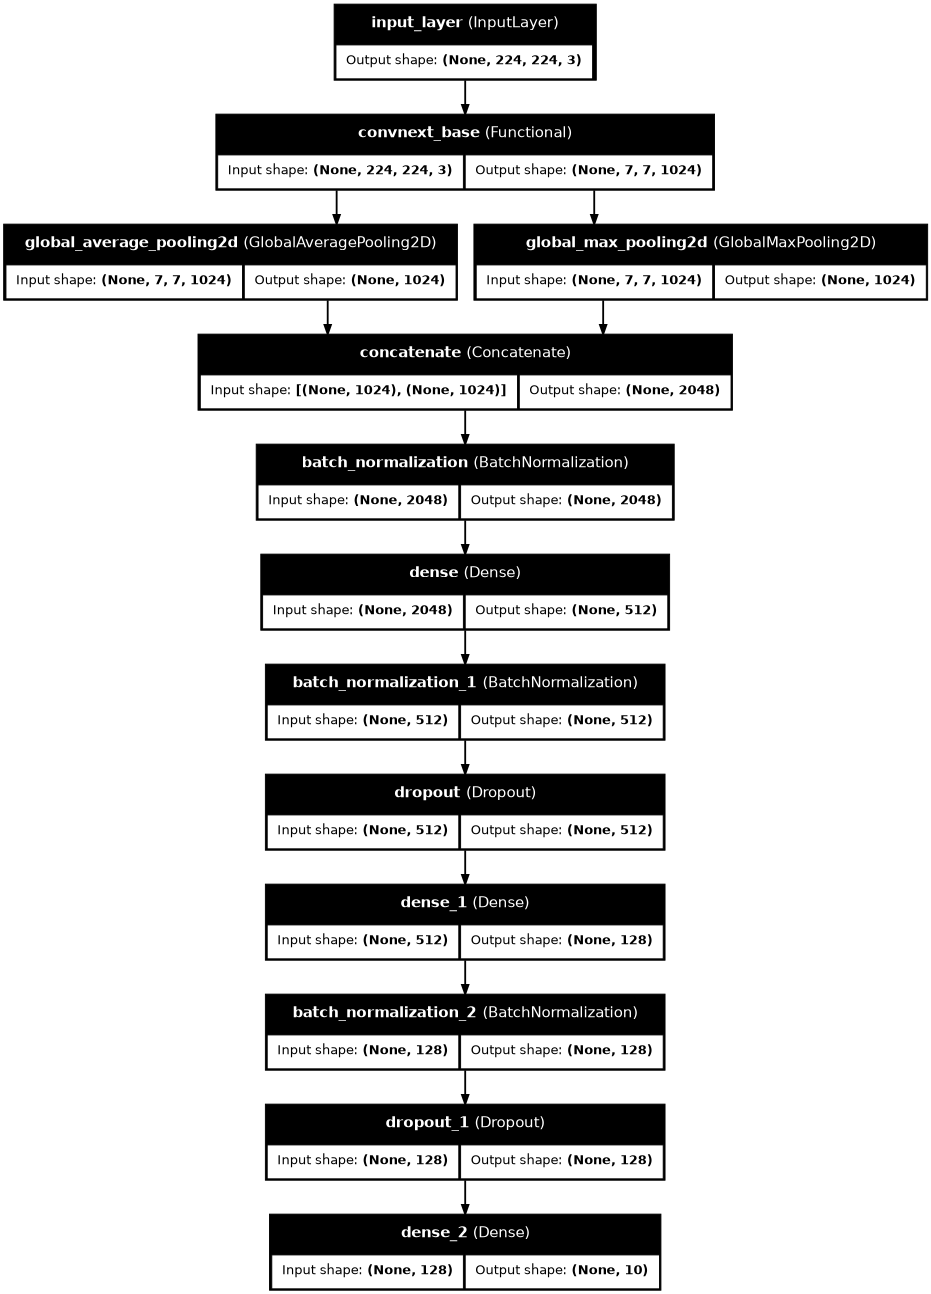

In [72]:
from tensorflow.keras.utils import plot_model
from PIL import Image

loaded_model = tf.keras.models.load_model('best_animals10_0.9916.keras')
#loaded_model.summary()


# # ОЦЕНКА ЗАГРУЖЕННОЙ МОДЕЛИ
# print(f"\n📊 ОЦЕНКА ЗАГРУЖЕННОЙ МОДЕЛИ...")
# val_results = loaded_model.evaluate(validation_data, verbose=1)
# val_loss, val_accuracy = val_results[0], val_results[1]
# print(f"✅ Результаты обученной модели:")
# print(f"   - Validation Accuracy: {val_accuracy:.4f}")
# print(f"   - Validation Loss: {val_loss:.4f}")

# 8. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
# Сохраняем модель
# loaded_model.save(f'trained_model_optuna_{val_accuracy:.4f}.keras')
# print("💾 Модель сохранена как 'trained_model_optuna_{val_accuracy:.4f}'")

plot_model(loaded_model, to_file=f'best_animals10__{val_accuracy:.4f}.png', show_shapes=True, show_layer_names=True, dpi=66)
#display(Image.open('model_temp.png'))
#plot_model(loaded_model, to_file=f'best_optuna_model_{val_accuracy:.4f}.png')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

history = final_history

'''
Синие тона:
cmap='Blues' # твой текущий
cmap='viridis' 
cmap='coolwarm'
cmap='icefire'

Зеленые тона:
cmap='Greens'
cmap='viridis'
cmap='summer'

Красные/оранжевые:
cmap='Reds'
cmap='Oranges'
cmap='YlOrBr'  
cmap='hot'

Фиолетовые:
cmap='Purples'
cmap='magma'
cmap='plasma'
'''


def get_all_predictions_modern(model, dataset):
    """Получает все предсказания и метки из датасета"""
    print("🔄 Собираем предсказания и метки...")
    
    all_preds = []
    all_true_labels = []
    
    # Проходим по всем батчам датасета
    for batch_idx, (images, labels) in enumerate(dataset):
        # Получаем предсказания для текущего батча
        batch_preds = model.predict(images, verbose=0)
        all_preds.append(batch_preds)
        all_true_labels.append(labels.numpy())
        
        # Прогресс каждые 10 батчей
        if (batch_idx + 1) % 10 == 0:
            print(f"📦 Обработано батчей: {batch_idx + 1}")
    
    # Объединяем все батчи
    all_preds = np.concatenate(all_preds, axis=0)
    all_true_labels = np.concatenate(all_true_labels, axis=0)
    
    print(f"✅ Собрано {len(all_preds)} предсказаний")
    return all_preds, all_true_labels

def safe_confusion_matrix_analysis(model, dataset, class_names):
    """Безопасный анализ confusion matrix с автоматической обработкой отсутствующих классов"""
    print("📊 ЗАПУСКАЕМ CONFUSION MATRIX АНАЛИЗ...")
    
    # Получаем предсказания
    print("🔄 Получаем предсказания...")
    preds, true_labels = get_all_predictions_modern(model, dataset)
    
    # Для sparse categorical - метки уже целые числа, не нужно argmax
    if len(true_labels.shape) == 1:  # sparse labels [0, 1, 2, ...]
        true_classes = true_labels
    else:  # one-hot encoded labels
        true_classes = np.argmax(true_labels, axis=1)
    
    preds_classes = np.argmax(preds, axis=1)
    
    # Находим какие классы реально присутствуют в данных
    present_true_classes = np.unique(true_classes)
    present_pred_classes = np.unique(preds_classes)
    
    print(f"🔢 Уникальные истинные классы: {present_true_classes}")
    print(f"🔢 Уникальные предсказанные классы: {present_pred_classes}")
    
    # Определяем какие классы из class_names реально присутствуют
    present_class_indices = sorted(present_true_classes)
    present_class_names = [class_names[i] for i in present_class_indices]
    
    print(f"📋 Присутствующие классы: {present_class_names}")
    
    absent_classes = [class_names[i] for i in range(len(class_names)) if i not in present_true_classes]
    if absent_classes:
        print(f"❌ Отсутствующие классы: {absent_classes}")
    
    # Создаем confusion matrix только для присутствующих классов
    cm = confusion_matrix(true_classes, preds_classes, labels=present_class_indices)
    
    print(f"📏 Confusion matrix shape: {cm.shape}")
    
    # Визуализируем
    plt.figure(figsize=(max(8, len(present_class_names)), max(6, len(present_class_names))))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=present_class_names, 
                yticklabels=present_class_names,
                cbar_kws={'label': 'Количество'})
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.title(f'Confusion Matrix ({len(present_class_names)} из {len(class_names)} классов)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Статистика
    total_samples = len(true_classes)
    accuracy = np.sum(preds_classes == true_classes) / total_samples
    
    print(f"\n📈 ДЕТАЛЬНАЯ СТАТИСТИКА:")
    print(f"Всего примеров: {total_samples}")
    print(f"Общая точность: {accuracy:.4f}")
    
    print(f"\n🎯 ТОЧНОСТЬ ПО КЛАССАМ:")
    for i, class_idx in enumerate(present_class_indices):
        class_name = class_names[class_idx]
        correct = cm[i, i]
        total = np.sum(cm[i, :])
        accuracy = correct / total if total > 0 else 0
        print(f"  {class_name}: {accuracy:.4f} ({correct}/{total})")
    
    # Для отсутствующих классов
    if absent_classes:
        print(f"\n❌ ОТСУТСТВУЮЩИЕ КЛАССЫ В ВАЛИДАЦИИ:")
        for class_name in absent_classes:
            print(f"  {class_name}: 0 примеров")
    
    # Classification report только для присутствующих классов
    print(f"\n📊 CLASSIFICATION REPORT:")
    print(classification_report(true_classes, preds_classes, 
                              labels=present_class_indices,
                              target_names=present_class_names, 
                              digits=4))
    
    # Нормализованная confusion matrix
    plt.figure(figsize=(max(8, len(present_class_names)), max(6, len(present_class_names))))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)  # Заменяем NaN на 0
    
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=present_class_names, 
                yticklabels=present_class_names,
                cbar_kws={'label': 'Доля'})
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.title(f'Normalized Confusion Matrix\n({len(present_class_names)} из {len(class_names)} классов)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return cm, present_class_names

# 🎯 ЗАПУСКАЕМ АНАЛИЗ
print("🚀 ЗАПУСК CONFUSION MATRIX АНАЛИЗА...")
cm, present_classes = safe_confusion_matrix_analysis(model, validation_data, class_names)

🚀 ЗАПУСК CONFUSION MATRIX АНАЛИЗА...
📊 ЗАПУСКАЕМ CONFUSION MATRIX АНАЛИЗ...
🔄 Получаем предсказания...
🔄 Собираем предсказания и метки...
📦 Обработано батчей: 10
📦 Обработано батчей: 20
📦 Обработано батчей: 30
📦 Обработано батчей: 40
📦 Обработано батчей: 50
📦 Обработано батчей: 60
📦 Обработано батчей: 70


🎲 ЗАПУСК УНИВЕРСАЛЬНОГО ТЕСТИРОВАНИЯ...
📥 Загружаем данные из dataset...
📊 Загружено 5235 изображений
📐 Формат изображений: (5235, 224, 224, 3)
🏷️ Формат меток: (5235,)
🎯 Делаем предсказания...
🔍 Обнаружен формат меток: SPARSE


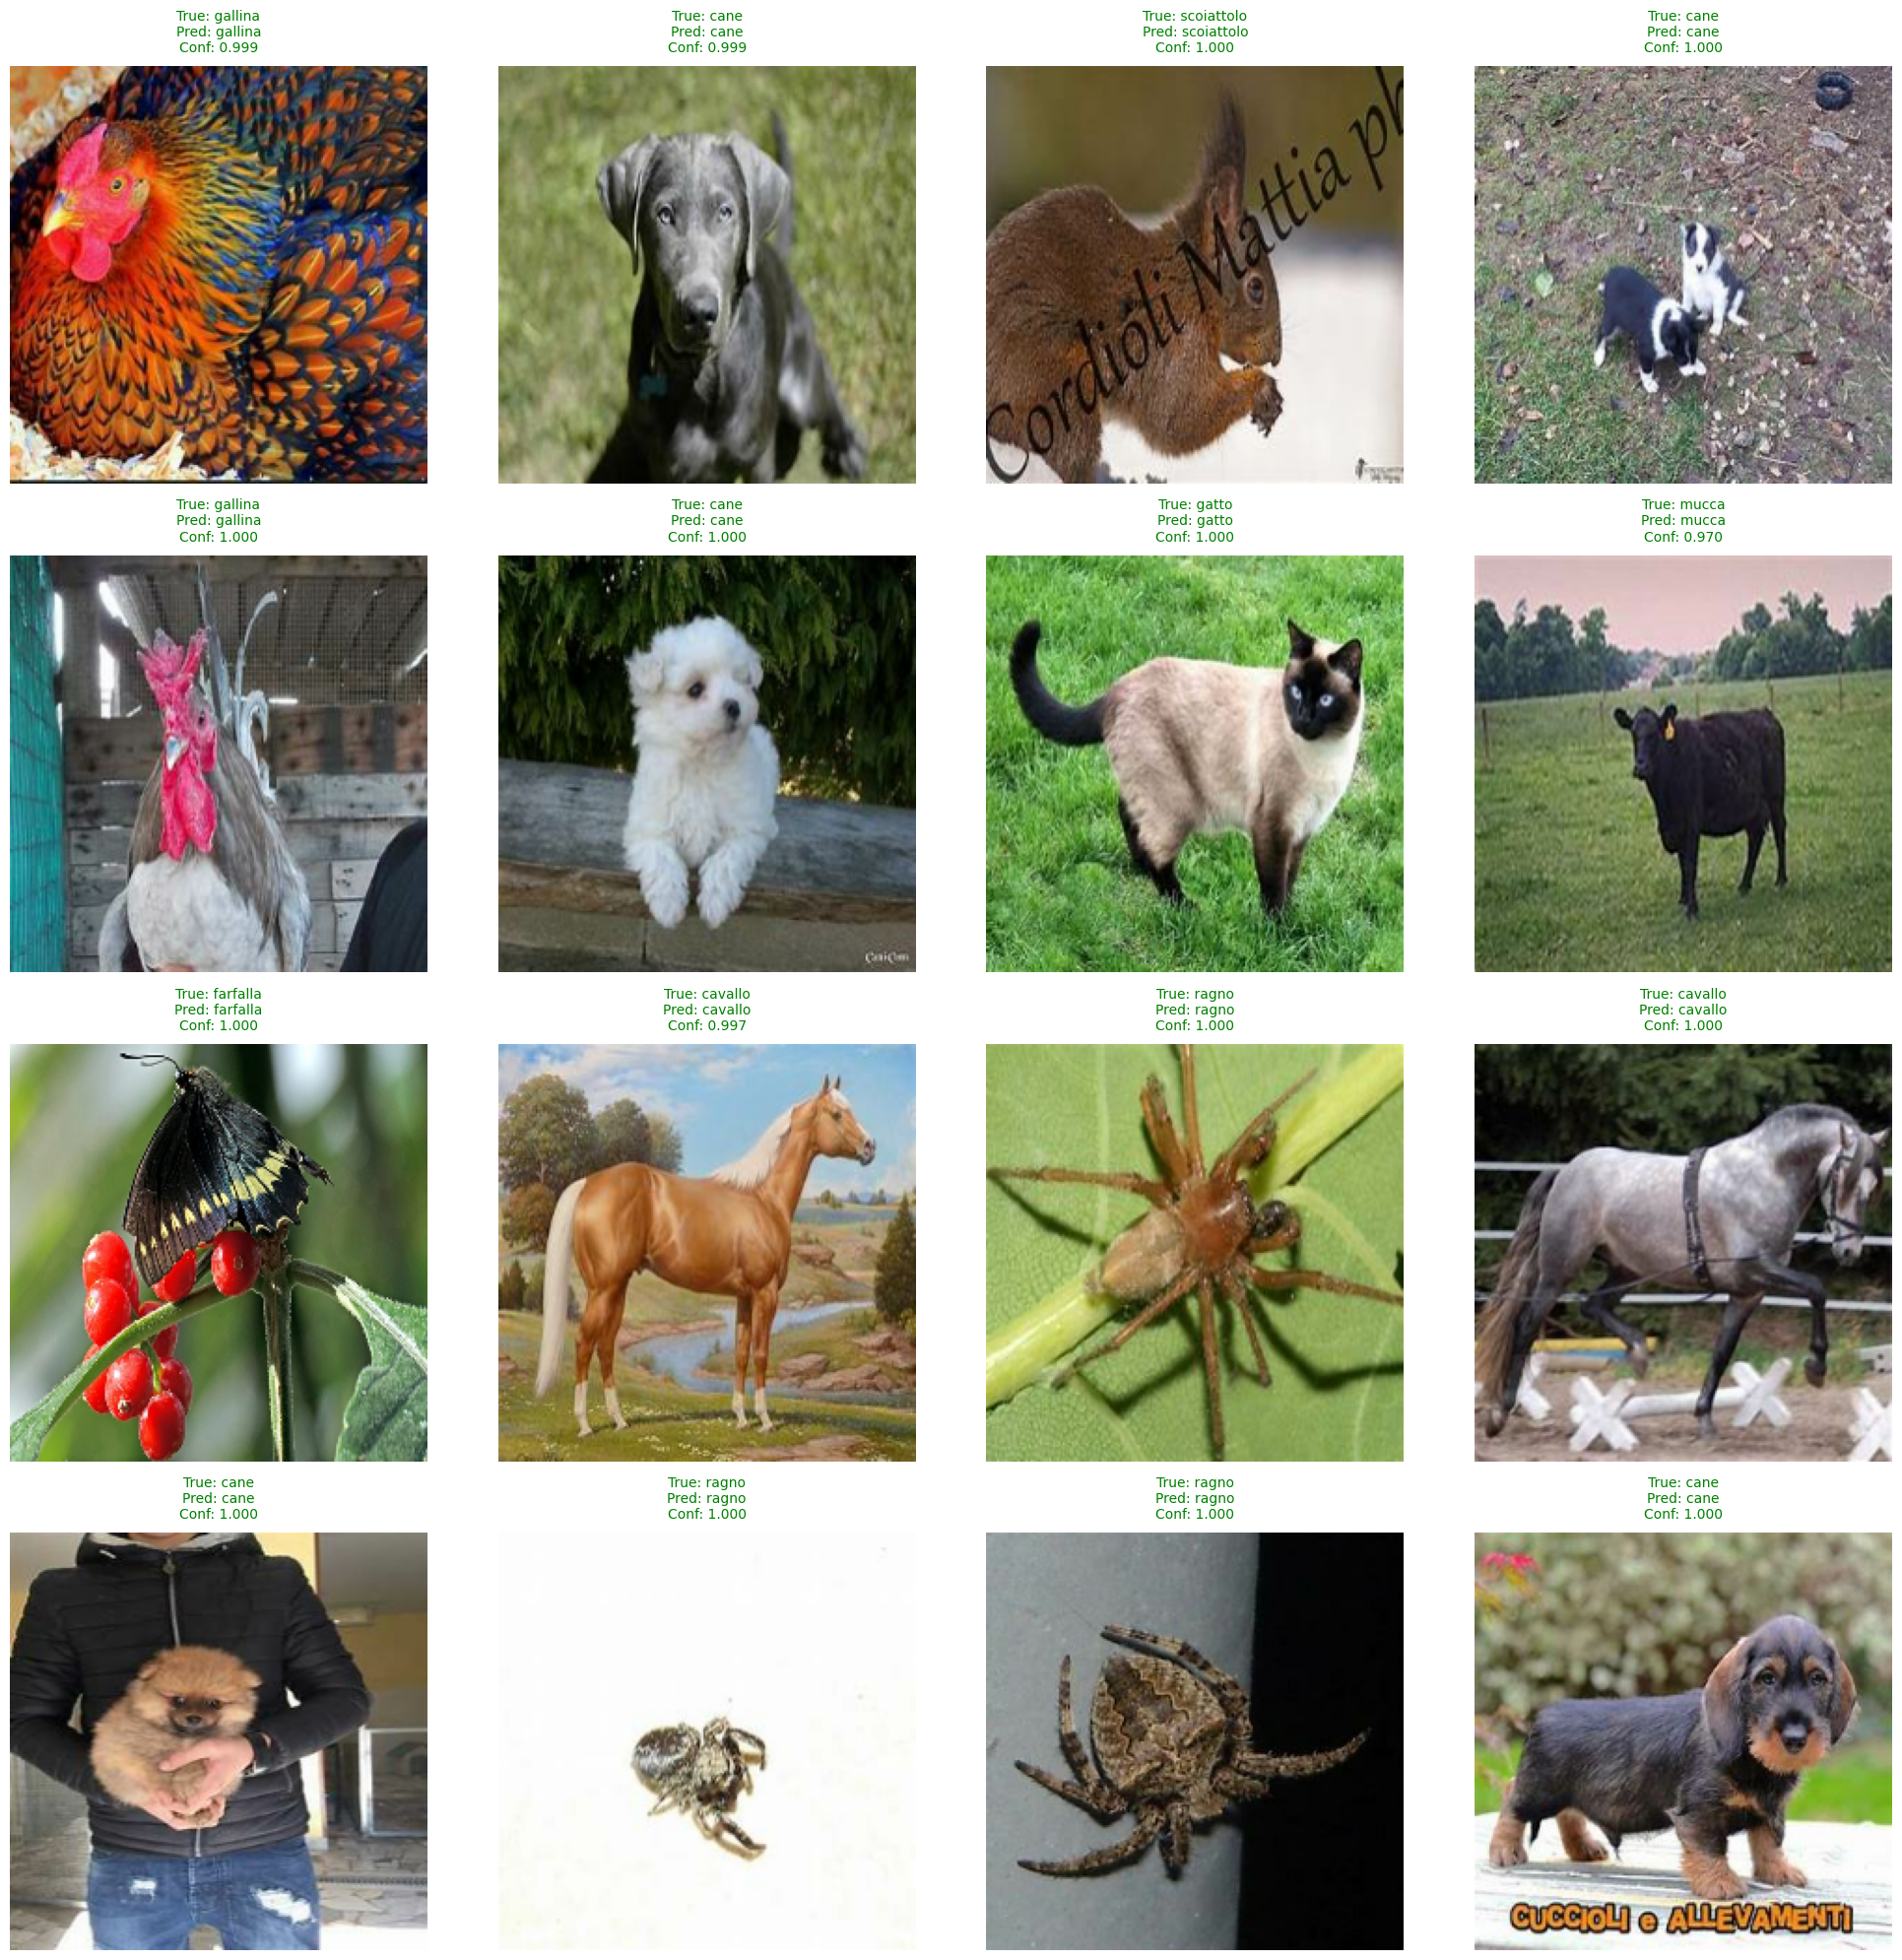


📊 РЕЗУЛЬТАТЫ ТЕСТИРОВАНИЯ:
   Правильных предсказаний: 16/16
   Точность: 100.0%
   Формат меток: SPARSE
   Диапазон изображений: [0.000, 255.000]
✅ Тестирование завершено!


In [60]:
# УНИВЕРСАЛЬНАЯ ВЕРСИЯ ДЛЯ ЛЮБОГО ФОРМАТА ДАННЫХ
def test_random_predictions_universal(model, dataset, class_names, num_samples=12):
    """
    Универсальная функция для тестирования модели на случайных примерах
    Работает с любым форматом меток (sparse, one-hot) и любым форматом изображений
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Собираем все данные из dataset
    print("📥 Загружаем данные из dataset...")
    all_images = []
    all_labels = []
    
    for batch_images, batch_labels in dataset:
        all_images.append(batch_images.numpy())
        all_labels.append(batch_labels.numpy())
    
    # Объединяем все батчи
    all_images = np.concatenate(all_images, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    
    print(f"📊 Загружено {len(all_images)} изображений")
    print(f"📐 Формат изображений: {all_images.shape}")
    print(f"🏷️ Формат меток: {all_labels.shape}")
    
    # Выбираем случайные примеры
    total_samples = len(all_images)
    num_samples = min(num_samples, total_samples)
    indices = np.random.choice(total_samples, num_samples, replace=False)
    
    selected_images = all_images[indices]
    selected_labels = all_labels[indices]
    
    # Делаем предсказания
    print("🎯 Делаем предсказания...")
    predictions = model.predict(selected_images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Определяем формат меток автоматически
    if len(selected_labels.shape) == 1:
        # SPARSE формат: [0, 1, 2, ...]
        true_classes = selected_labels
        label_format = "SPARSE"
    else:
        # ONE-HOT формат: [[1,0,0], [0,1,0], ...]
        true_classes = np.argmax(selected_labels, axis=1)
        label_format = "ONE-HOT"
    
    print(f"🔍 Обнаружен формат меток: {label_format}")
    
    # Создаем визуализацию
    cols = 4
    rows = (num_samples + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    
    # Если только одна строка, преобразуем axes в 2D массив
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    correct_predictions = 0
    
    # Обрабатываем каждый пример
    for i in range(num_samples):
        row = i // cols
        col = i % cols
        ax = axes[row, col]
        
        # Получаем изображение
        image = selected_images[i].copy()
        
        # 🔥 УМНАЯ ДЕНОРМАЛИЗАЦИЯ ДЛЯ ЛЮБОГО ФОРМАТА
        if image.min() >= -1 and image.max() <= 1:
            # EfficientNet V2 предобработка: [-1, 1] -> [0, 255]
            image = (image + 1) * 127.5
        elif image.min() >= 0 and image.max() <= 1:
            # Стандартная нормализация: [0, 1] -> [0, 255]
            image = image * 255
        elif image.min() >= 0 and image.max() <= 255:
            # Уже в правильном диапазоне
            pass
        else:
            # ImageNet нормализация: восстанавливаем оригинальные значения
            image = image * 255
        
        # Обеспечиваем правильный диапазон
        image = np.clip(image, 0, 255).astype(np.uint8)
        
        # 🔥 ПРАВИЛЬНОЕ ОТОБРАЖЕНИЕ ЦВЕТОВ
        # TensorFlow использует RGB, matplotlib использует RGB
        # НЕ нужно преобразовывать цвета!
        ax.imshow(image)
        
        # Получаем истинный и предсказанный классы
        true_class_idx = true_classes[i]
        pred_class_idx = predicted_classes[i]
        
        true_class_name = class_names[true_class_idx]
        pred_class_name = class_names[pred_class_idx]
        confidence = np.max(predictions[i])
        
        # 🔥 ПРАВИЛЬНОЕ ОПРЕДЕЛЕНИЕ ЦВЕТА
        is_correct = (true_class_idx == pred_class_idx)
        title_color = 'green' if is_correct else 'red'
        
        if is_correct:
            correct_predictions += 1
        
        # Создаем заголовок
        title = f"True: {true_class_name}\nPred: {pred_class_name}\nConf: {confidence:.3f}"
        ax.set_title(title, color=title_color, fontsize=10, pad=10)
        ax.axis('off')
    
    # Скрываем пустые subplots
    for i in range(num_samples, rows * cols):
        row = i // cols
        col = i % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Выводим статистику
    accuracy = (correct_predictions / num_samples) * 100
    print(f"\n📊 РЕЗУЛЬТАТЫ ТЕСТИРОВАНИЯ:")
    print(f"   Правильных предсказаний: {correct_predictions}/{num_samples}")
    print(f"   Точность: {accuracy:.1f}%")
    print(f"   Формат меток: {label_format}")
    print(f"   Диапазон изображений: [{selected_images.min():.3f}, {selected_images.max():.3f}]")
    
    return correct_predictions, accuracy

# ТЕСТИРУЕМ УНИВЕРСАЛЬНУЮ ВЕРСИЮ
print("🎲 ЗАПУСК УНИВЕРСАЛЬНОГО ТЕСТИРОВАНИЯ...")
print("=" * 50)

correct, accuracy = test_random_predictions_universal(
    model=model,
    dataset=validation_data, 
    class_names=class_names,
    num_samples=16
)

print("=" * 50)
print(f"✅ Тестирование завершено!")

In [ ]:
# Сохраните модель

# Сохраняем обученную модель
model.save('cats_dogs_classifier.h5')
print("💾 Модель сохранена как 'cats_dogs_classifier.h5'")

# Или сохраняем только веса
model.save_weights('cats_dogs_weights.h5')
print("💾 Веса сохранены как 'cats_dogs_weights.h5'")

In [32]:
# Сохраняем в современном формате
model.save('best_model_scotp-2.keras')
print("💾 Модель сохранена как 'best_model_1.keras'")

💾 Модель сохранена как 'best_model_1.keras'
